## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_snotel_UA_12hr_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
#asos_snotel_UA_df['LXV_WindSpeed_m/s']

#asos_snotel_UA_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)

asos_snotel_UA_df.astype('float16')
pd.set_option('display.expand_frame_repr', True)


print(asos_snotel_UA_df.keys())




#delete empty columns as they mess up loops
#del asos_snotel_UA_df['CMtn_6hr_Precipitation_mm']            #empty column


Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_Pressure_hp', 'CMtn_WindDirection_deg',
       'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas',
       'CMtn_1hr_Precipitation_mm', 'CMtn_6hr_Precipitation_mm',
       ...
       'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc',
       'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts',
       'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc',
       'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts'],
      dtype='object', length=165)


It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

In [3]:
#asos_snotel_UA_df['LXV_12hr_delta_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+12)
#print(asos_snotel_UA_df['LXV_12hr_delta_Pressure_hp'].describe())


***
# OLS Analysis of meteorological variables and snowfall (Training Dataset: 2008-2017 only)

**We will first utilize just the Copper Mountain surface level variables and run the model explicitly to generate statistics.  This will give snowfall predictive capability of individual meteorological variables (Dewpoint, SNOTEL Temperature, Temperature, Wind Speed, Cloud Cover, Wind Direction, 6hr Pressure change, and Pressure) using an OLS model and the 2008-2017 training dataset. The resulting values will also be used to verify some code which performs same analysis, but with a loop.  This code will then be fed all upper air and surface level variables to determine best combination of variables in the OLS model.**


In [4]:
#Import statsmodel

import statsmodels.api as sm
#import statsmodel
from statsmodels.formula.api import ols

### Single Variable OLS (CMtn Surface Variables)


In [5]:


OLS_CMtn_Dewpoint = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_Dewpoint_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtnSNTL_Temp = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtnSNTL_Temp_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_Temperature = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_Temperature_degC',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_WindSpeed = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_WindSpeed_mps',asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_CloudCover = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_CloudCover_oktas', asos_snotel_UA_df['2008':'2017']).fit()
OLS_CMtn_WindDirection = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_WindDirection_deg', asos_snotel_UA_df['2008':'2017']).fit()
OLS_LXV_12hr_delta_Pressure = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ LXV_12hr_delta_Pressure_hp', asos_snotel_UA_df['2008':'2017']).fit()
OLS_LXV_Pressure = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ LXV_Pressure_hp', asos_snotel_UA_df['2008':'2017']).fit()


print(OLS_CMtn_Dewpoint.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtnSNTL_Temp.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Temperature.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_WindSpeed.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_CloudCover.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_WindDirection.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_LXV_12hr_delta_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_LXV_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")



#['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
#       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
#       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
#       'LXV_Temperature_degC', 'LXV_Dewpoint_degC'


#print(a.rsquared)
#print(a.rsquared_adj)
#print(a.rsquared_adj)
#print(a.fvalue)
#print(a.f_pvalue)
#print(a.pvalues)
print(OLS_CMtn_Dewpoint.params)
#qq=sm.qqplot(a.resid, line='r')



                                      OLS Regression Results                                     
Dep. Variable:     CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in   R-squared:                       0.014
Model:                                               OLS   Adj. R-squared:                  0.008
Method:                                    Least Squares   F-statistic:                     2.504
Date:                                   Fri, 01 Feb 2019   Prob (F-statistic):              0.115
Time:                                           11:55:32   Log-Likelihood:                -409.26
No. Observations:                                    183   AIC:                             822.5
Df Residuals:                                        181   BIC:                             828.9
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

#### Single Variable Summary
**Adjusted R:**  
OLS_CMtn_Dewpoint: 0.007  
OLS_CMtnSNTL_Temp:  -0.002 
OLS_CMtn_Temperature: -0.005  
OLS_CMtn_WindSpeed:  0.017  
OLS_CMtn_CloudCover:  0.000  
OLS_CMtn_WindDirection:  -0.004  
OLS_LXV_6hr_delta_Pressure:   0.004  
OLS_LXV_Pressure:    -0.003  

**Prob (F-statistic):**  
OLS_CMtn_Dewpoint: 0.139  
OLS_CMtnSNTL_Temp: 0.483  
OLS_CMtn_Temperature:  0.708  
OLS_CMtn_WindSpeed:  0.0466  
OLS_CMtn_CloudCover: 0.316 
OLS_CMtn_WindDirection:   0.614  
OLS_LXV_6hr_delta_Pressure:  0.155  
OLS_LXV_Pressure:   0.550 
  
From this, we can glean that Dewpoint alone likely has the best fit as the adjusted R squared is the highest.  The F statistics such signficant correlations (at 5% confident interval) for only  Dewpoint and Pressure).

## Run OLS model with all surface variables only

In [6]:
variables = ['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', \
 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_CloudCover_oktas', 'LXV_12hr_delta_Pressure_hp']
from collections import OrderedDict

variables_org = variables
print(variables)

print('******')
adjRs = []
newRs = []
dup_var = []
max_vars = []
f_pvalues = []

while variables != []:
  #print(variables)
  for var in variables:

        
    #print(variables)
    max_var = max(variables, key = lambda v: ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + v, asos_snotel_UA_df['2008':'2017']).fit().rsquared_adj)    #this finds OLS model run with highest adj R squared
    OLS = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + max_var, asos_snotel_UA_df['2008':'2017']).fit()
    
    print(max_var)
    #print(max_var)
    #print(OLS.rsquared)
    
    #Create lists of statistics for each combination of variables modeld
    adjRs.append(OLS.rsquared_adj)
    f_pvalues.append(OLS.f_pvalue)
    max_vars.append(max_var)

    add_max_var = '+ '+ max_var
    
    variables = [s + add_max_var for s in variables_org]
    
    #The above for loop naturally will create a duplicate variable, which should be removed
    for v in variables_org: 
      dup_var = []
      dup_var = [var for var in variables if var.count(v)>1]
      if dup_var!=[]:
            for dup in dup_var: variables.remove(dup)

#combine the modeled variable sequences with respective stats  
stats = list(zip(adjRs, f_pvalues))    # create list of tuples
dictionary = OrderedDict(zip(max_vars, stats))
#dictionary_adjRs = OrderedDict(zip(max_vars, f_pvalues))
print(adjRs)
print(max_vars)
print(f_pvalues)
print(dictionary)


['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_CloudCover_oktas', 'LXV_12hr_delta_Pressure_hp']
******
CMtn_WindSpeed_mps
CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_WindDirection_deg+ LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_Dewpoint_degC+ LXV_WindDirection_deg+ LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_Pressure_hp+ LXV_Dewpoint_degC+ LXV_WindDirection_deg+ LXV_Tempera

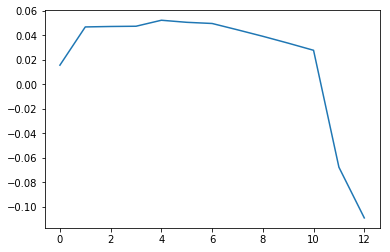

In [7]:
plt.plot(adjRs)

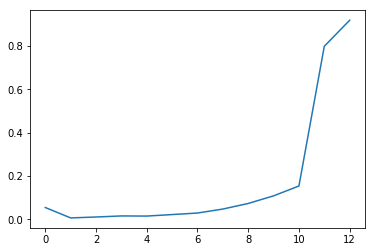

In [8]:
plt.plot(f_pvalues)

In [9]:
variables = ['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', \
 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_CloudCover_oktas', 'LXV_12hr_delta_Pressure_hp']

good_vars = []
bad_vars = []
for var in variables:
    idx = np.isfinite(asos_snotel_UA_df['2008':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']) & np.isfinite(asos_snotel_UA_df['2008':'2017'][var])
    total_poss = len(asos_snotel_UA_df['2008':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][asos_snotel_UA_df['2008':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=0])
    total_avail =len(asos_snotel_UA_df['2008':'2017'][idx])
    if total_avail/total_poss >= 0.67: 
        good_vars.append(var)
    else:
        bad_vars.append(var)
        
print('Variables with >= 67% data match to snowfall: ')
print(good_vars)
print('Variables with < 67% data match to snowfall: ')
print(bad_vars)
    

Variables with >= 67% data match to snowfall: 
['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp']
Variables with < 67% data match to snowfall: 
['CMtn_CloudCover_oktas', 'LXV_CloudCover_oktas']


**Now rerun model with just the good variables**

In [10]:
from collections import OrderedDict

variables = good_vars
variables_org = variables
print(variables)

print('******')
adjRs = []
newRs = []
dup_var = []
max_vars = []
f_pvalues = []

while variables != []:
  #print(variables)
  for var in variables:

        
    #print(variables)
    max_var = max(variables, key = lambda v: ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + v, asos_snotel_UA_df['2008':'2017']).fit().rsquared_adj)    #this finds OLS model run with highest adj R squared
    OLS = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + max_var, asos_snotel_UA_df['2008':'2017']).fit()
    
    print(max_var)
    #print(max_var)
    #print(OLS.rsquared)
    
    #Create lists of statistics for each combination of variables modeld
    adjRs.append(OLS.rsquared_adj)
    f_pvalues.append(OLS.f_pvalue)
    max_vars.append(max_var)

    add_max_var = '+ '+ max_var
    
    variables = [s + add_max_var for s in variables_org]
    
    #The above for loop naturally will create a duplicate variable, which should be removed
    for v in variables_org: 
      dup_var = []
      dup_var = [var for var in variables if var.count(v)>1]
      if dup_var!=[]:
            for dup in dup_var: variables.remove(dup)

#combine the modeled variable sequences with respective stats  
stats = list(zip(adjRs, f_pvalues))    # create list of tuples
dictionary = OrderedDict(zip(max_vars, stats))
#dictionary_adjRs = OrderedDict(zip(max_vars, f_pvalues))
print(adjRs)
print(max_vars)
print(f_pvalues)
print(dictionary)

['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp']
******
CMtn_WindSpeed_mps
CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_WindDirection_deg+ LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_Dewpoint_degC+ LXV_WindDirection_deg+ LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
LXV_Pressure_hp+ LXV_Dewpoint_degC+ LXV_WindDirection_deg+ LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_

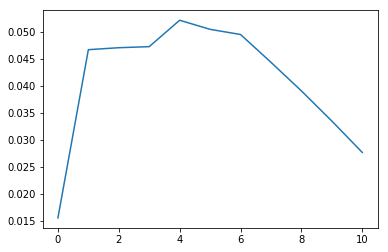

In [11]:
plt.plot(adjRs)

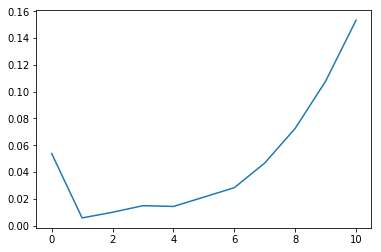

In [12]:
plt.plot(f_pvalues)

**Print adjusted R and F stat probabilities in order**

In [13]:


for c in dictionary:
    #print(str(dictionary.keys().index(c))+"{country}: {capital}".format(country=c, capital=dictionary[c])+"\n")
        print(str(list(dictionary.keys()).index(c))+ " {key} \n Adjusted R: {adjR}  Fstat(prob): {f_pvalue}".format(key=c, adjR=dictionary[c][0], f_pvalue = dictionary[c][1])+"\n")
        OLS = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + c, asos_snotel_UA_df['2008':'2017']).fit()



0 CMtn_WindSpeed_mps 
 Adjusted R: 0.015493750436263887  Fstat(prob): 0.05379135723415213

1 CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 
 Adjusted R: 0.046706785825847974  Fstat(prob): 0.005766179258162408

2 LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 
 Adjusted R: 0.04707248180100265  Fstat(prob): 0.009984716475325534

3 CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 
 Adjusted R: 0.04727040722613729  Fstat(prob): 0.01490452446942609

4 LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 
 Adjusted R: 0.052168676951357074  Fstat(prob): 0.01431395070727962

5 LXV_WindDirection_deg+ LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 
 Adjusted R: 0.050480447150988206  Fstat(prob): 0.021264126310746083

6 LXV_Dewpoint_degC+ LXV_WindDirection_deg+ LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_P

**Find max adj R and obtain OLS summary**

In [14]:
 # Just use 'min' instead of 'max' for minimum.
print("Print maximum:")
maximum = max(dictionary, key=dictionary.get) 
print(maximum)

Print maximum:
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps


In [15]:
maximum_all_str = max(dictionary, key=dictionary.get) 
print(maximum_all_str)

maxOLS_all = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + maximum_all_str , asos_snotel_UA_df['2008':'2017']).fit() 
print(maxOLS_all.summary())


LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
                                      OLS Regression Results                                     
Dep. Variable:     CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in   R-squared:                       0.079
Model:                                               OLS   Adj. R-squared:                  0.052
Method:                                    Least Squares   F-statistic:                     2.937
Date:                                   Fri, 01 Feb 2019   Prob (F-statistic):             0.0143
Time:                                           11:55:35   Log-Likelihood:                -384.84
No. Observations:                                    177   AIC:                             781.7
Df Residuals:                                        171   BIC:                             800.7
Df Model:                                              5                                         
Covari

**Print QQ plot**

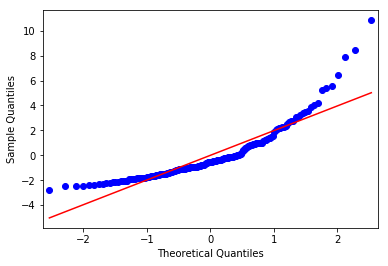

In [16]:
qq2=sm.qqplot(maxOLS_all.resid, line='r')

Let's test different P|t| thresholds for which to remove variables, rerun and model for each set of variables, and see what threshold might glean best results using adjusted R squared as a metric**

In [17]:
rsq_adj = 0
thresh = 0

goodp_str = ""
highp_var = []

maximum_all_str = max(dictionary, key=dictionary.get)    #this is the string of variables found in previous OLS run associated with mad adjusted R squared.
print(maximum_all_str)


for test_thresh in range(1, 100):   #loop through different P|t| thresholds ranging from 1 to 100.  Note floats are not allowed here 
  print(test_thresh)
  highp_var = [var for var in maxOLS_all.pvalues.keys() if maxOLS_all.pvalues[var]>=test_thresh*0.01]  #check P|t| for each variable against threshold and store in list
  
  testgoodp_str = maximum_all_str   #reset testgoodp_str 
    
  for var in highp_var:
    testgoodp_str = testgoodp_str.replace("+ " + var, "")   #  
     

 

  maxOLS_testgoodp = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + testgoodp_str, asos_snotel_UA_df['2008':'2017']).fit()
  print(testgoodp_str, maxOLS_testgoodp.rsquared_adj, test_thresh*0.01)
  #print(maxOLS_testgoodp.rsquared_adj)
  if maxOLS_testgoodp.rsquared_adj > rsq_adj:
      rsq_adj = maxOLS_testgoodp.rsquared_adj
      print(maxOLS_testgoodp.rsquared_adj, test_thresh*0.01)
      goodp_str = testgoodp_str
      thresh = test_thresh*0.01

    
print("\n best threshold is:" + str(thresh))
maxOLS_goodp = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + goodp_str, asos_snotel_UA_df['2008':'2017']).fit() 
print(maxOLS_goodp.summary())


LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps
1
LXV_Temperature_degC+ CMtn_Dewpoint_degC 0.00305533563938587 0.01
0.00305533563938587 0.01
2
LXV_Temperature_degC+ CMtn_Dewpoint_degC 0.00305533563938587 0.02
3
LXV_Temperature_degC+ CMtn_Dewpoint_degC 0.00305533563938587 0.03
4
LXV_Temperature_degC+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.04204056368526976 0.04
0.04204056368526976 0.04
5
LXV_Temperature_degC+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.04204056368526976 0.05
6
LXV_Temperature_degC+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.04204056368526976 0.06
7
LXV_Temperature_degC+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.04204056368526976 0.07
8
LXV_Temperature_degC+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.04204056368526976 0.08
9
LXV_Temperature_degC+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.04204056368526976 0.09
10
LXV_Temperature_degC+ CMtn_Temperature_degC+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.04768154134813496

LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.052168676951357074 0.67
68
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.052168676951357074 0.68
69
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.052168676951357074 0.6900000000000001
70
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.052168676951357074 0.7000000000000001
71
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.052168676951357074 0.71
72
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.052168676951357074 0.72
73
LXV_Temperature_degC+ CMtn_Temperature_degC+ LXV_12hr_delta_Pressure_hp+ CMtn_Dewpoint_degC+ CMtn_WindSpeed_mps 0.052168676951

**So it looks like the best P|t| threshold for variable elimination is 0.18.  No improvement to adjusted R squared could be made**

## Try fit parameters with test dataset (2006 and 2007 data)

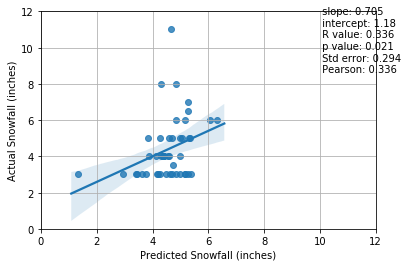

In [18]:

from scipy.stats import pearsonr, linregress
#print(asos_snotel_UA_df['2006':'2007'][asos_snotel_UA_df['2006':'2007']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=3].describe())

actual_snf = asos_snotel_UA_df['2006':'2007']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][asos_snotel_UA_df['2006':'2007']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=3]
predict = maxOLS_goodp.predict(asos_snotel_UA_df['2006':'2007'][asos_snotel_UA_df['2006':'2007']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=3])
#print(actual_snf.describe())


idx = np.isfinite(predict) & np.isfinite(actual_snf) 
sns.regplot(predict[idx], actual_snf[idx])

#print(asos_snotel_UA_df['2006':'2007'][asos_snotel_UA_df['CMtnSNTL_Past12hrSNOWFALL_in']>=3].describe())

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(predict[idx], actual_snf[idx])
pearson1, pv = pearsonr(predict[idx], actual_snf[idx])
plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,3)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=10)

plt.xlabel('Predicted Snowfall (inches)')
plt.ylabel('Actual Snowfall (inches)')
plt.xlim([0,12])
plt.ylim([0,12])
plt.grid(True)
#print(actual_snf.describe())
#print(predict.describe())

[4.98424095 4.97480445 4.70961011 4.55886725 5.34369469 3.82799135
 5.25792217 4.35833122 3.87930834 5.18047038 4.60060072 4.30892818
 4.10632268 5.29457035 4.8526515  4.21049205 4.65653833 1.33985957
 6.31786824 4.64228127 5.28159006 4.3717721  3.43249965 4.28231864
 5.17543054 4.29659133 4.39925397 3.40681503 4.58446297 4.83132936
 3.61681323 5.05151966 4.97171454 5.28332768 4.73345433 5.36873586
 4.84464543 4.48901978 4.14755441 2.9391963  6.07234125 4.38191683
 4.41856028 4.25784887 4.6929693  3.76377347 5.16758655]
[ 5.   4.   5.   4.   5.   5.   7.   4.   4.   3.   4.   8.   4.   5.
  8.   3.  11.   3.   6.   3.   3.   4.   3.   5.   6.   4.   4.   3.
  5.   6.   3.   5.   3.   6.5  3.5  3.   3.   3.   3.   3.   6.   4.
  4.   3.   3.   3.   3. ]
0.5531914893617021 0.723404255319149 0.851063829787234


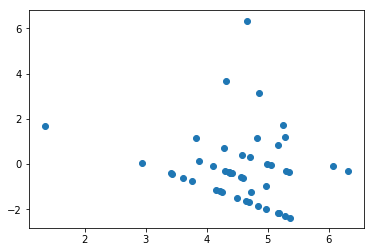

In [20]:
plt.scatter(predict[idx].values, actual_snf[idx].values-predict[idx].values)
print(predict[idx].values)
print(actual_snf[idx].values)
#print(actual_snf[idx].values-predict[idx].values)



diff = actual_snf[idx].values-predict[idx].values
PercentSuccess1 = len([x for x in diff if abs(x)<=1])/len(diff)
PercentSuccess15 = len([x for x in diff if abs(x)<=1.5])/len(diff)
PercentSuccess2= len([x for x in diff if abs(x)<=2])/len(diff)
print(PercentSuccess1, PercentSuccess15, PercentSuccess2)

25.731977441292017


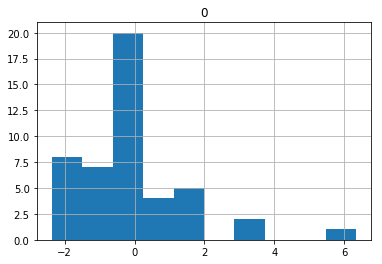

In [23]:
diff_df = pd.DataFrame(diff)
hist = diff_df.hist()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predict[idx].values, actual_snf[idx].values-predict[idx].values)
print(mse)
